Выполнили: Тигин Леонид, Коренев Илья, Клевцов Александр

Цель работы: применение методов статистической обработки экспериментальных
данных при измерении сопротивлений.

Используем 
- pandas для анализа снятых результатов
- matplotlib для построения гистограмм 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

Получили табличку измерений сопртивления резисторов.

In [3]:
df = pd.read_csv("lab_2.csv")
df

,R
0,418.56
1,420.90
2,420.70
3,421.14
4,421.35
...,...
146,420.02
147,421.89
148,420.65
149,421.78


Найдем среднее, максимальное и минимальные значенения. 

In [4]:
R = df.mean()
R_max = df.max()
R_min = df.min()
R, R_max, R_misn 

(R    421.111192
 dtype: float64,
 R    425.12
 dtype: float64,
 R    417.21
 dtype: float64)

Получаем, что:
$\mathrm{\newline \langle R \rangle = 421.11 \ Ом 
 \newline R_{max} = 425.12 \ Ом 
 \newline R_{min} = 417.12 \ Ом}$

Построим гистограмму для m = 10 

array([[<AxesSubplot:title={'center':'R'}>]], dtype=object)

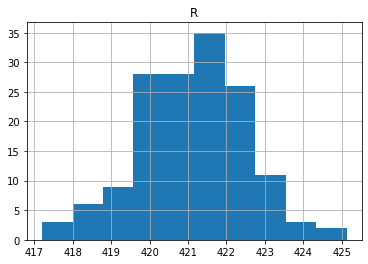

In [5]:
df.hist(bins=10)

Теперь построим гистограмму для m = 20

array([[<AxesSubplot:title={'center':'R'}>]], dtype=object)

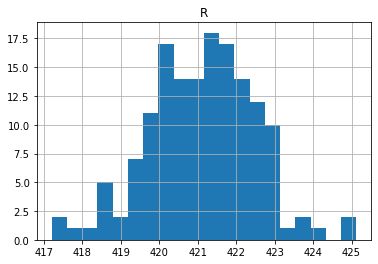

In [6]:
df.hist(bins=20)

In [7]:
sigma = float(df.std(ddof=0))
sigma

1.3773575464627072

$\sigma = 1.3773575464627072$

In [8]:
mean_r = float(df.mean())

Тепер соединим две гистограммы и нанесем построить функцию
распределения Гаусса:
$\frac{1}{\sigma\sqrt{2\pi}}
   \exp\left(-\frac{(R-\langle R \rangle)^2}{2\sigma^2}\right)$

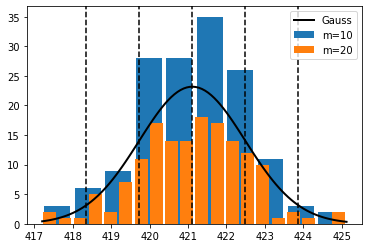

In [24]:
plt.hist(df, bins=10, label="m=10", rwidth=0.85)
plt.hist(df, bins=20, label="m=20",rwidth=0.85)
rv = norm(mean_r,sigma)
x = np.linspace(df.min(),df.max(), 100)
plt.plot(x, 80*rv.pdf(x), 'k', lw=2, label='Gauss')
xposition = [mean_r - 2*sigma, mean_r - sigma, mean_r, mean_r + sigma, mean_r + 2*sigma]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.legend()
plt.show()

In [10]:
xposition

[418.3564769600547,
 419.73383450651744,
 421.11119205298013,
 422.4885495994428,
 423.86590714590557]

In [25]:
count = 0 
for index, row in df.iterrows():
    if (int(row['R']) > mean_r - sigma and int(row['R'] > mean_r) + sigma):
        count += 1
count/151

0.8013245033112583

In [26]:
count = 0 
for index, row in df.iterrows():
    if (int(row['R']) > mean_r - 2*sigma and int(row['R'] > 2*mean_r) + sigma):
        count += 1
count/151

0.9337748344370861

Доля результатов, попавших в интервал от 
$\newline \langle R \rangle - \sigma$ до $\newline \langle R \rangle + \sigma$ равна 0.80

Доля результатов, попавших в интервал от 
$\newline \langle R \rangle - 2\sigma$ до $\newline \langle R \rangle + 2\sigma$ равна 0.93

In [30]:
sigma_mean = sigma / 150*(0.5)
sigma_mean 

0.004591191821542357

In [31]:
sigma

1.3773575464627072

In [37]:
count = 0 
for index, row in df.iterrows():
    if (int(row['R']) > mean_r - sigma_mean and int(row['R'] > mean_r) + sigma_mean):
        count += 1
count/151

0.2781456953642384